In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [43]:
# Let us consider 'titanic' dataset which has continous and categorical columns from seaborn module
titanic = sns.load_dataset("titanic")
titanic

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [44]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [45]:
# Imputing the missing values in age and embarked
titanic['age'] = titanic.groupby(['pclass','sex'])['age'].transform(lambda x: x.fillna(x.median()))

In [46]:
titanic['embarked'].fillna(titanic['embarked'].mode()[0], inplace = True)

In [47]:
titanic['embark_town'].fillna(titanic['embark_town'].mode()[0], inplace = True)

In [48]:
# We have imputed the missing values in both age and embraked columns
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          891 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     891 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  891 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [49]:
# Convert data types to correct ones
# Change dtypes of survived, pclass, sibsp, parch to object datatype
titanic[['survived','pclass','sibsp','parch','adult_male','alone']] = titanic[['survived','pclass','sibsp','parch','adult_male','alone']].astype('object')

In [50]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    object  
 1   pclass       891 non-null    object  
 2   sex          891 non-null    object  
 3   age          891 non-null    float64 
 4   sibsp        891 non-null    object  
 5   parch        891 non-null    object  
 6   fare         891 non-null    float64 
 7   embarked     891 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    object  
 11  deck         203 non-null    category
 12  embark_town  891 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    object  
dtypes: category(2), float64(2), object(11)
memory usage: 92.8+ KB


In [51]:
# Only selecting continous columns
cont_variables = titanic.select_dtypes(['float64','int64'])
cont_variables

,age,fare
0,22.0,7.2500
1,38.0,71.2833
2,26.0,7.9250
3,35.0,53.1000
4,35.0,8.0500
...,...,...
886,27.0,13.0000
887,19.0,30.0000
888,21.5,23.4500
889,26.0,30.0000


In [52]:
# Only selecting categorical columns
cat_variables = titanic.select_dtypes(['object','category','bool'])
cat_variables

,survived,pclass,sex,sibsp,parch,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,1,0,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,1,0,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,0,0,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,1,0,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,0,0,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,0,0,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,0,0,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,1,2,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,0,0,C,First,man,True,C,Cherbourg,yes,True


In [53]:
# Drop the duplicates in the dataset
titanic.drop_duplicates(inplace=True, ignore_index=False)
titanic

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
885,0,3,female,39.0,0,5,29.1250,Q,Third,woman,False,NaN,Queenstown,no,False
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,21.5,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [54]:
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [55]:
# Visualization to see what columns are critical for survival

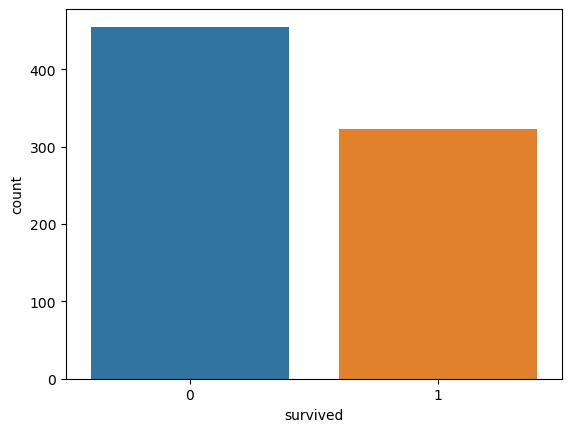

In [56]:
sns.countplot('survived',data=titanic)
plt.show()

In [57]:
# From the above graph it is clear that not many persons survived.
# If we want to explore further to see which gender survived
titanic.groupby(['sex', 'survived'])['survived'].count()


sex     survived
female  0            76
        1           217
male    0           379
        1           106
Name: survived, dtype: int64

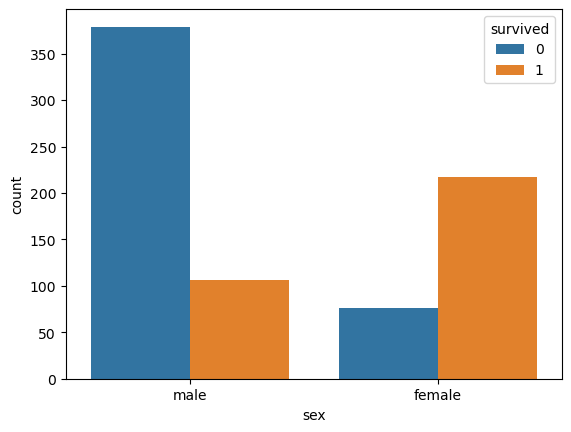

In [58]:
# It is clear that 217 female survived out of 293. And out of 485 male 106 survived. 
# The survival ratio of female is much greater than that of male. It can be seen clearly in following graph
sns.countplot('sex',hue='survived',data=titanic)
plt.show()


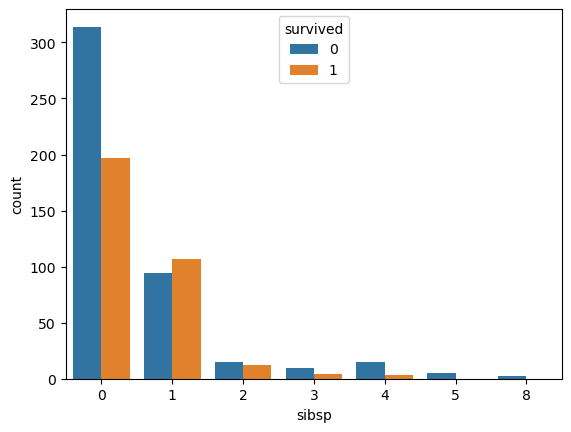

In [59]:
sns.countplot('sibsp',hue='survived',data=titanic)
plt.show()


In [60]:
# We see from the above plot that people with 1 or 2 additional family had better survival rate as they were rescued first
# But when it comes to large families they had bad survival rate. This might be because of pclass. We will check this below

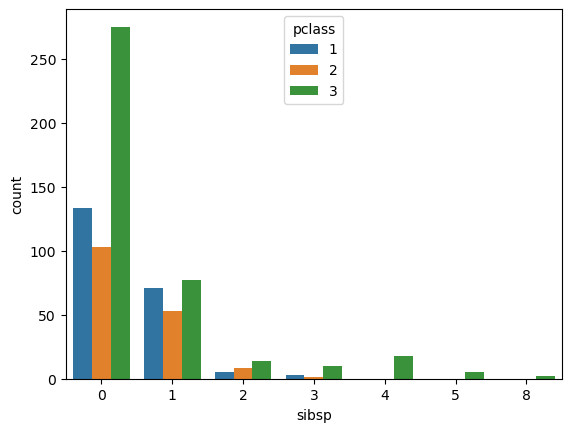

In [61]:
# Analysis of parch is simillar to sibsp as we can see below
sns.countplot('sibsp',hue='pclass',data=titanic)
plt.show()


<AxesSubplot:xlabel='parch', ylabel='count'>

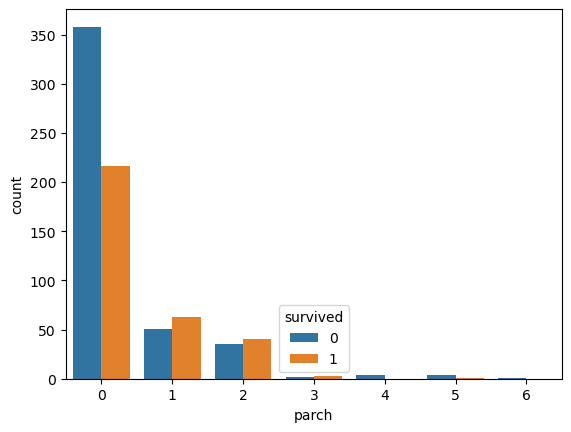

In [62]:
sns.countplot('parch', hue='survived', data=titanic)


In [63]:
# As seen above people with bigger family belonged to class 3. so we can infer that class 1 and 2 with big family had good
# survival compared to class 3

<AxesSubplot:xlabel='parch', ylabel='count'>

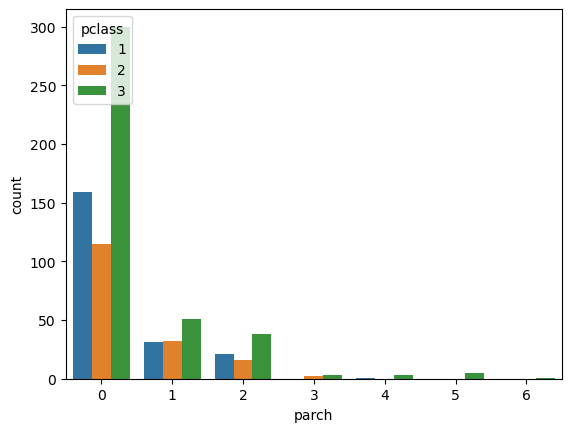

In [64]:
sns.countplot('parch',hue='pclass',data=titanic)


<AxesSubplot:xlabel='fare', ylabel='Count'>

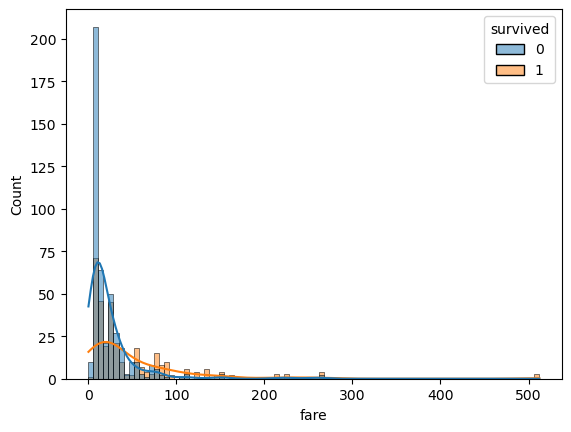

In [65]:
# Let us analyze fare over survival rate
sns.histplot(x=titanic['fare'],hue=titanic['survived'],kde=True)

In [66]:
# As the fare increased the survival also increased so people who bought higher tickets were able to survive

Text(0.5, 1.0, 'Sex & Age Vs Survived')

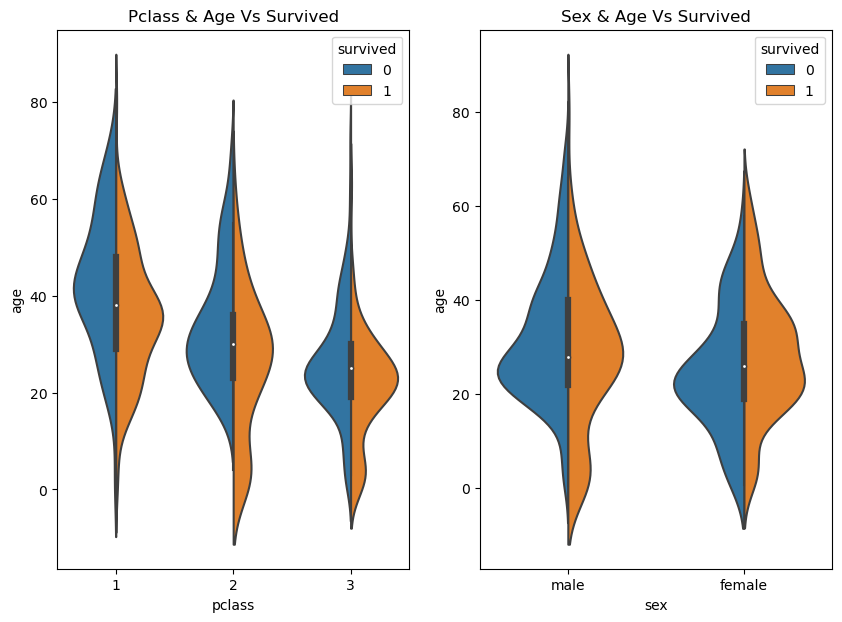

In [67]:
# Survival rate of age in a particular pclass
# Survival rate of gender and age
plt.figure(figsize = (10,7))
plt.subplot(1, 2, 1)
sns.violinplot('pclass','age',hue='survived',data=titanic,split=True)
plt.title("Pclass & Age Vs Survived")
plt.subplot(1, 2, 2)
sns.violinplot('sex','age',hue='survived',data=titanic,split=True)
plt.title("Sex & Age Vs Survived")


In [68]:
# From above violen plots, following observations are clear,
# 1) The no of children is increasing from Class 1 to 3, the number of children in Class 3 is greater than other two. 
# 2) Survival rate of children, for age 10 and below is good irrespective of Class 
# 3) Survival rate between age 20-30 is well and is quite better for women.

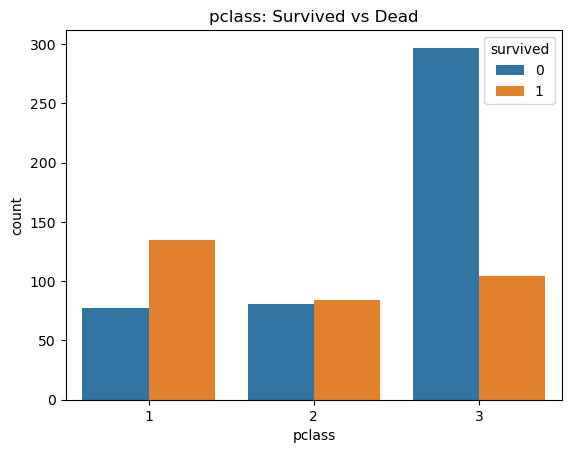

In [69]:
# We see that sex is a critical feature
# Will explore other features
sns.countplot('pclass', hue='survived', data=titanic)
plt.title('pclass: Survived vs Dead')
plt.show()

In [70]:
# We can clearly see that though there are more passengers in Class 3 very few survived. While as greater percentage
# of passengers survived from class 1 and 2. class of passerngers did have major impact on survival rate

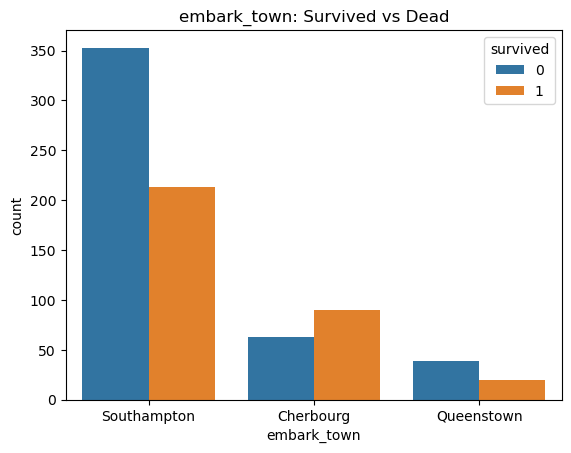

In [71]:
sns.countplot('embark_town', hue='survived', data=titanic)
plt.title('embark_town: Survived vs Dead')
plt.show()

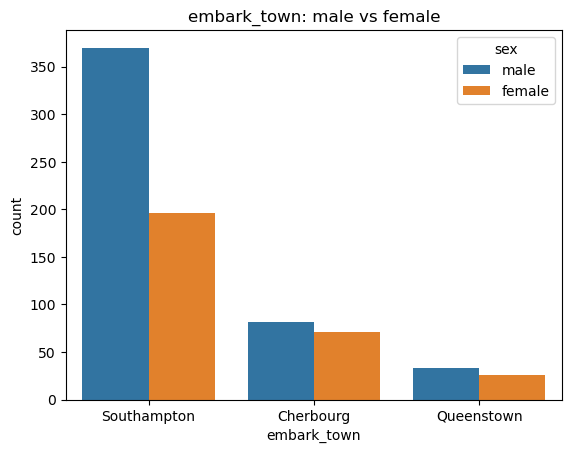

In [72]:
# People from Cherbourg and Queenstown had better survival rate than people from southampton
# Let us see if this had any relation with sex
sns.countplot('embark_town', hue='sex', data=titanic)
plt.title('embark_town: male vs female')
plt.show()

In [73]:
# We can infer that cherbourg and queenstown has good gender ratio so survival rate was high in those places

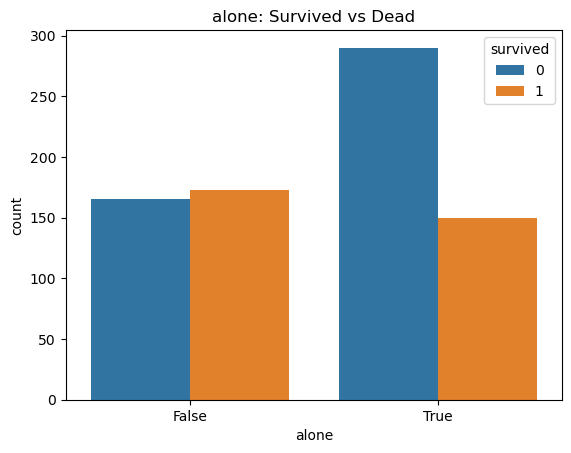

In [74]:
# Checking is being alone has any impact on survival rate
sns.countplot('alone', hue='survived', data=titanic)
plt.title('alone: Survived vs Dead')
plt.show()

In [75]:
# We can infer that survival rate way very low for alone person compared to one with family

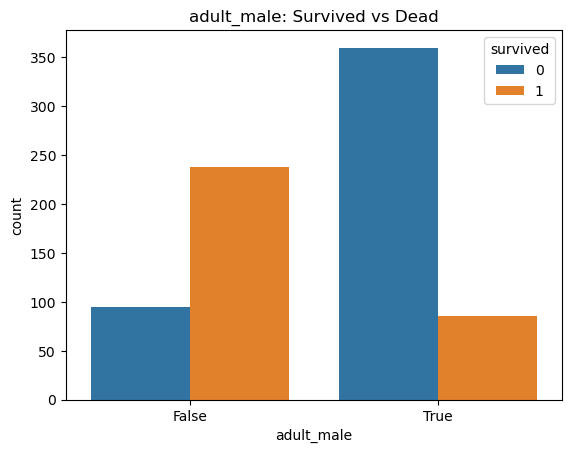

In [76]:
# Checking is being adult_male has any impact on survival rate
sns.countplot('adult_male', hue='survived', data=titanic)
plt.title('adult_male: Survived vs Dead')
plt.show()

In [77]:
# The survival rate for adult_male is really low compared to child

In [78]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [79]:
# class is simillar to pclass so we can keep one and drop other, who is simillar to sex so we keep sex and drop who, 
# survived is simillar to alive so we keep survived and drop alive, deck only has few values the missing values are huge so we
# drop deck, embarked and embarked_town are same so we can drop embarked
titanic.drop(["class",'who','alive','deck','embarked'],axis=1,inplace=True)

In [80]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,adult_male,embark_town,alone
0,0,3,male,22.0,1,0,7.2500,True,Southampton,False
1,1,1,female,38.0,1,0,71.2833,False,Cherbourg,False
2,1,3,female,26.0,0,0,7.9250,False,Southampton,True
3,1,1,female,35.0,1,0,53.1000,False,Southampton,False
4,0,3,male,35.0,0,0,8.0500,True,Southampton,True


In [81]:
titanic.to_csv('titanic.csv')

In [82]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 778 entries, 0 to 890
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   survived     778 non-null    object 
 1   pclass       778 non-null    object 
 2   sex          778 non-null    object 
 3   age          778 non-null    float64
 4   sibsp        778 non-null    object 
 5   parch        778 non-null    object 
 6   fare         778 non-null    float64
 7   adult_male   778 non-null    object 
 8   embark_town  778 non-null    object 
 9   alone        778 non-null    object 
dtypes: float64(2), object(8)
memory usage: 66.9+ KB
